<a href="https://colab.research.google.com/github/abraham-30/ProjectStockPrediction/blob/main/Stock%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Authors**

Abraham Mahayana Setiawan (2602188950/PPTI 14)

Davin Raffilio (2602189190/PPTI 14)

Grisella Meirisia Zega (2602189266/PPTI 14)

In [1]:
#!wget https://raw.githubusercontent.com/abraham-30/ProjectStockPrediction/main/dataset/ANTM.JK.csv
#!wget https://raw.githubusercontent.com/abraham-30/ProjectStockPrediction/main/dataset/ASII.JK.csv
!wget https://raw.githubusercontent.com/abraham-30/ProjectStockPrediction/main/dataset/BBCA.JK.csv
#!wget https://raw.githubusercontent.com/abraham-30/ProjectStockPrediction/main/dataset/BBRI.JK.csv
#!wget https://raw.githubusercontent.com/abraham-30/ProjectStockPrediction/main/dataset/BREN.JK.csv
#!wget https://raw.githubusercontent.com/abraham-30/ProjectStockPrediction/main/dataset/CUAN.JK.csv
#!wget https://raw.githubusercontent.com/abraham-30/ProjectStockPrediction/main/dataset/EXCL.JK.csv
#!wget https://raw.githubusercontent.com/abraham-30/ProjectStockPrediction/main/dataset/FREN.JK.csv
#!wget https://raw.githubusercontent.com/abraham-30/ProjectStockPrediction/main/dataset/GOTO.JK.csv
#!wget https://raw.githubusercontent.com/abraham-30/ProjectStockPrediction/main/dataset/MDKA.JK.csv

--2024-07-09 02:27:22--  https://raw.githubusercontent.com/abraham-30/ProjectStockPrediction/main/dataset/BBCA.JK.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 390770 (382K) [text/plain]
Saving to: ‘BBCA.JK.csv’

BBCA.JK.csv         100%[===================>] 381.61K  --.-KB/s    in 0.03s   

2024-07-09 02:27:22 (12.2 MB/s) - ‘BBCA.JK.csv’ saved [390770/390770]



In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import r2_score, mean_squared_error,  mean_absolute_error

In [3]:
#data_stock = pd.read_csv('ANTM.JK.csv') #Antam
#data_stock = pd.read_csv('ASII.JK.csv') #Astra International
data_stock = pd.read_csv('BBCA.JK.csv') #Bank Central Asia
#data_stock = pd.read_csv('BBRI.JK.csv') #Bank Rakyat Indonesia
#data_stock = pd.read_csv('BREN.JK.csv') #Barito Renewables
#data_stock = pd.read_csv('CUAN.JK.csv') #Petrindo Jaya Kreasi
#data_stock = pd.read_csv('EXCL.JK.csv') #XL Axiata
#data_stock = pd.read_csv('FREN.JK.csv') #Smartfren
#data_stock = pd.read_csv('GOTO.JK.csv') #Goto
#data_stock = pd.read_csv('MDKA.JK.csv') #Merdeka Copper

#EDA

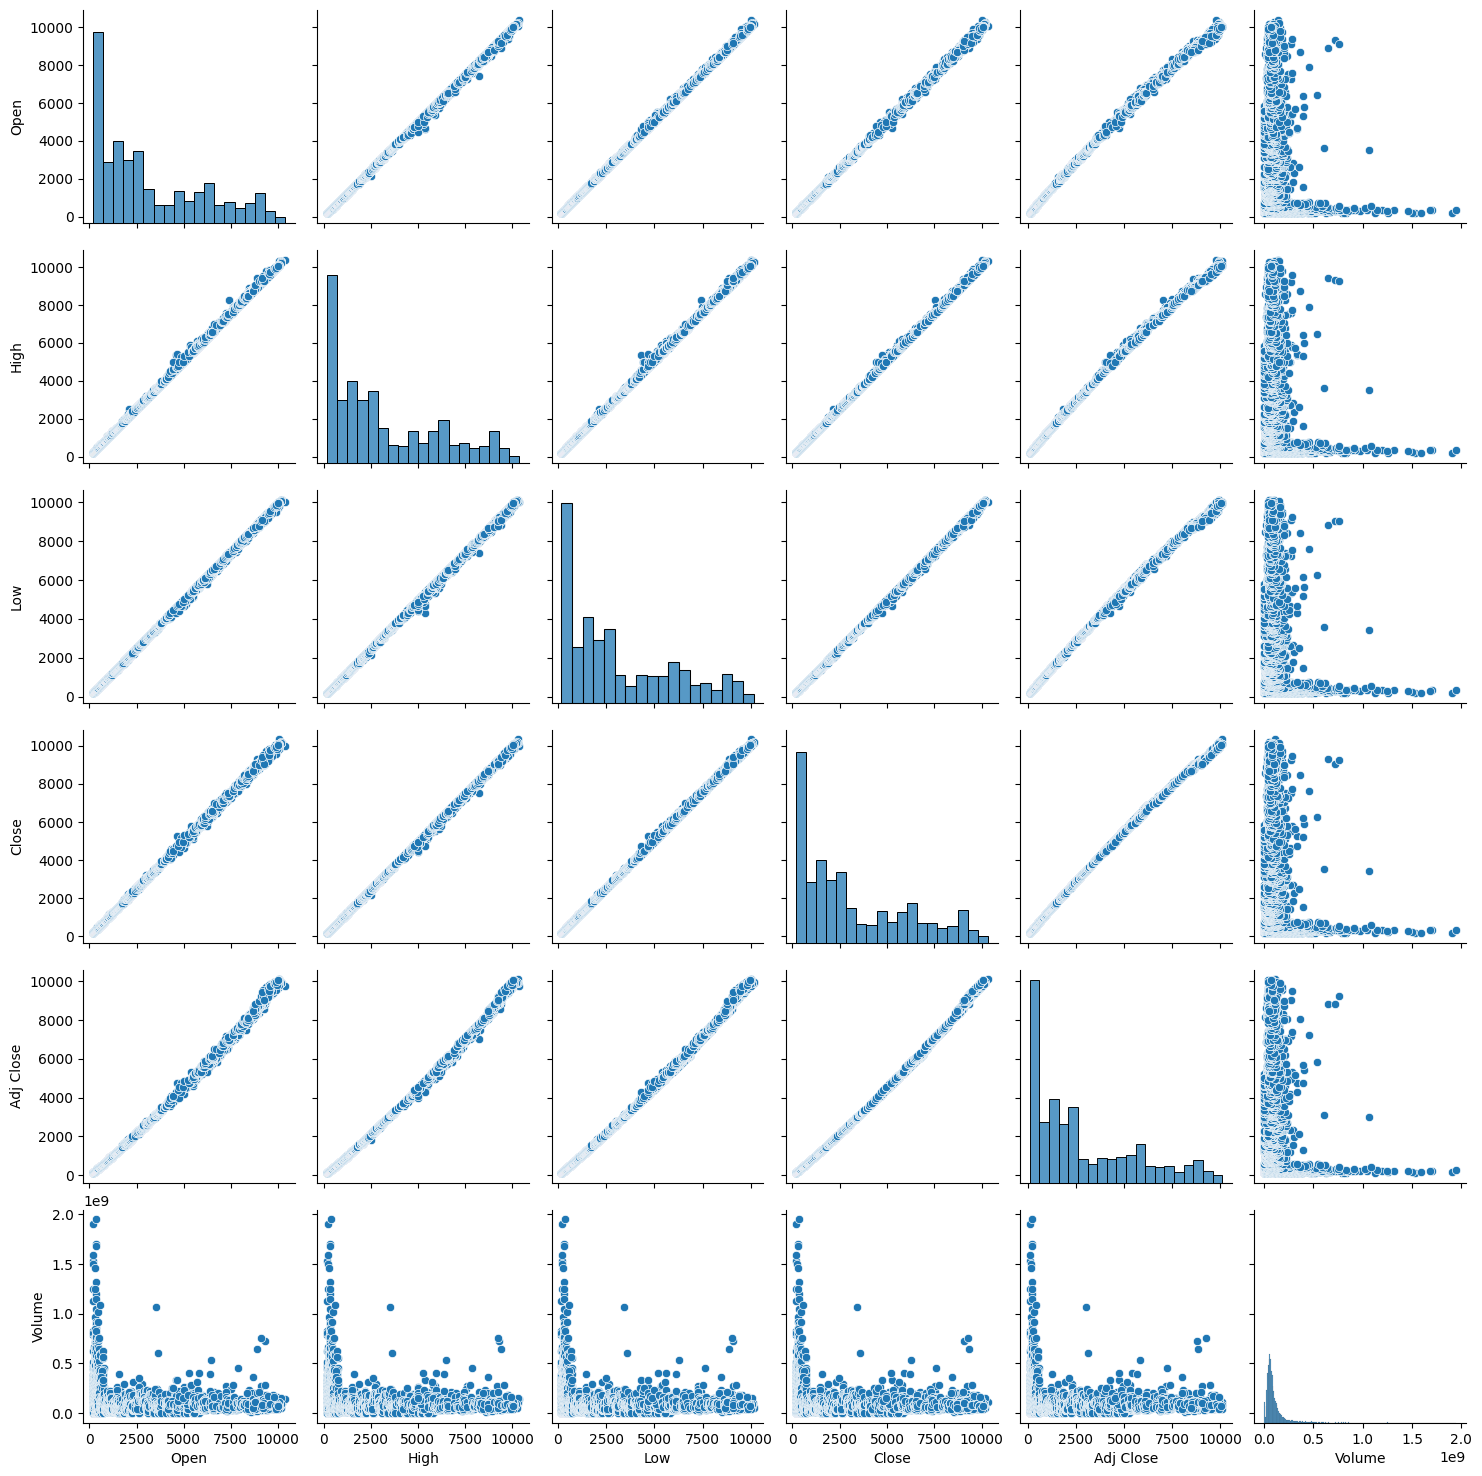

In [4]:
sb.pairplot(data_stock)

In [5]:
data_stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-06-08,175.0,180.0,175.0,177.5,103.276207,499150000
1,2004-06-09,177.5,182.5,175.0,180.0,104.730766,294290000
2,2004-06-10,180.0,180.0,177.5,180.0,104.730766,165590000
3,2004-06-11,177.5,180.0,177.5,180.0,104.730766,135830000
4,2004-06-14,180.0,180.0,175.0,177.5,103.276207,158540000
...,...,...,...,...,...,...,...
4960,2024-07-02,10000.0,10000.0,9850.0,9900.0,9900.000000,78848500
4961,2024-07-03,9975.0,10000.0,9925.0,10000.0,10000.000000,55860200
4962,2024-07-04,9975.0,10000.0,9825.0,9825.0,9825.000000,67054000
4963,2024-07-05,9925.0,9975.0,9875.0,9950.0,9950.000000,36946900


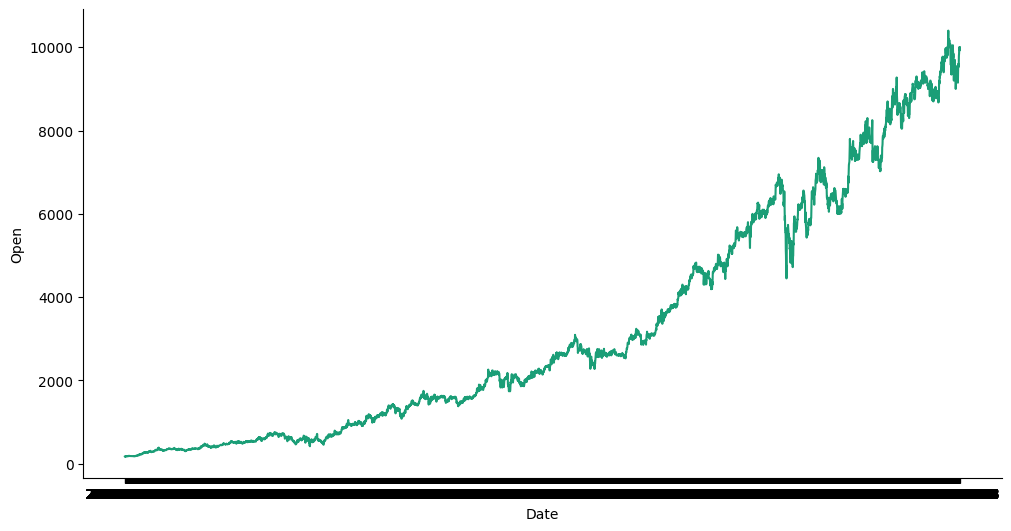

In [6]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sb.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Open']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data_stock.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sb.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Open')

In [62]:
data_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4525 entries, 0 to 4524
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4525 non-null   float64
 1   Open       4525 non-null   float64
 2   High       4525 non-null   float64
 3   Low        4525 non-null   float64
 4   Close      4525 non-null   float64
 5   Adj Close  4525 non-null   float64
 6   Volume     4525 non-null   float64
dtypes: float64(7)
memory usage: 247.6 KB


In [8]:
data_stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4.965000e+03
mean,3254.477845,3284.815710,3222.766365,3254.256798,2937.101421,1.076779e+08
std,2814.333765,2836.368948,2791.763002,2813.606568,2726.400005,1.296038e+08
min,175.000000,177.500000,175.000000,177.500000,103.276207,0.000000e+00
25%,725.000000,735.000000,715.000000,725.000000,554.011414,4.928500e+07
50%,2250.000000,2275.000000,2215.000000,2250.000000,1906.070068,7.315750e+07
75%,5530.000000,5560.000000,5475.000000,5505.000000,4928.124023,1.169610e+08
max,10400.000000,10400.000000,10150.000000,10325.000000,10092.431641,1.949960e+09


<Axes: xlabel='Date'>

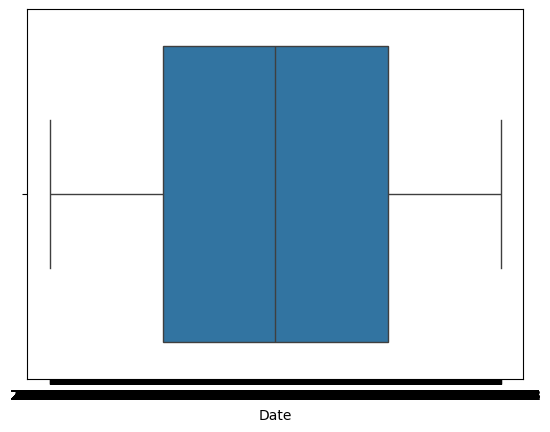

In [9]:
sb.boxplot(data=data_stock, x="Date")

<Axes: xlabel='Open'>

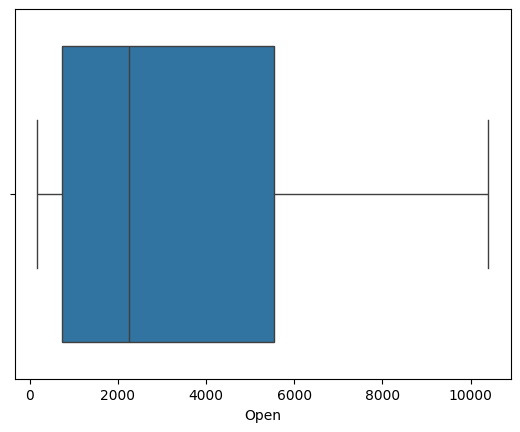

In [10]:
sb.boxplot(data=data_stock, x="Open")

<Axes: xlabel='High'>

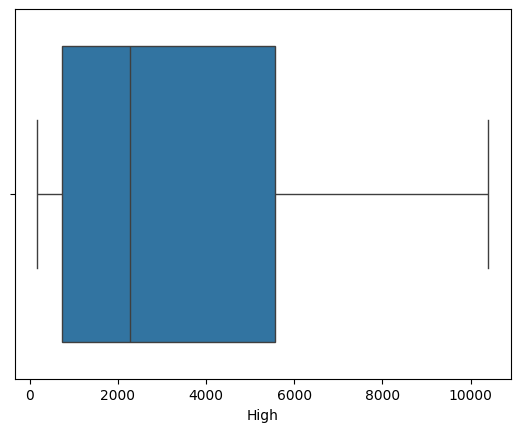

In [11]:
sb.boxplot(data=data_stock, x="High")

<Axes: xlabel='Low'>

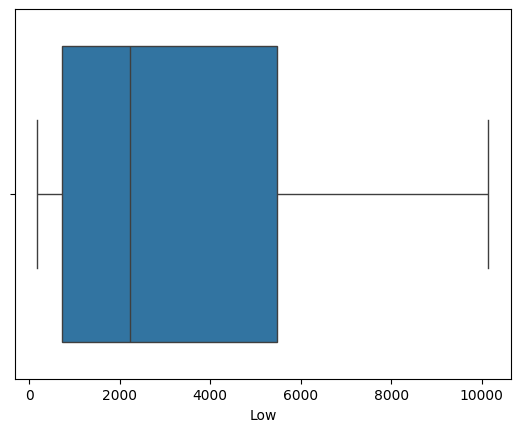

In [12]:
sb.boxplot(data=data_stock, x="Low")

<Axes: xlabel='Close'>

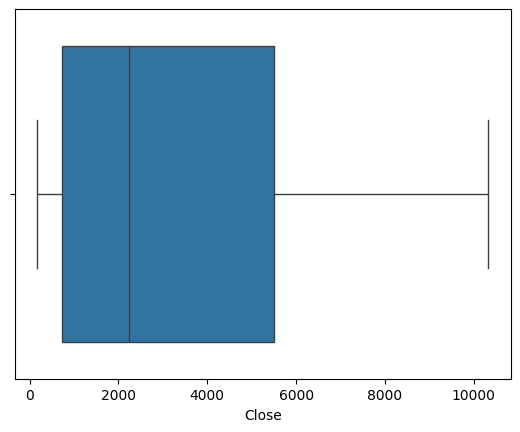

In [13]:
sb.boxplot(data=data_stock, x="Close")

<Axes: xlabel='Adj Close'>

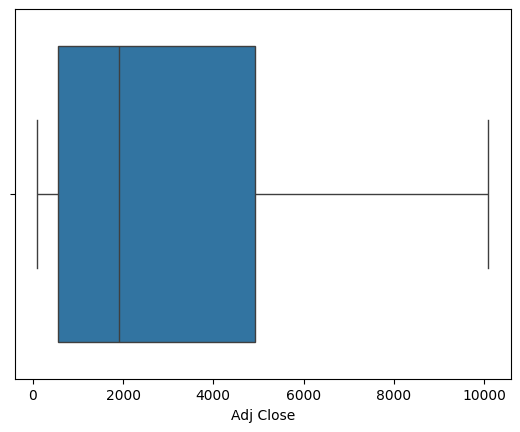

In [14]:
sb.boxplot(data=data_stock, x="Adj Close")

<Axes: xlabel='Volume'>

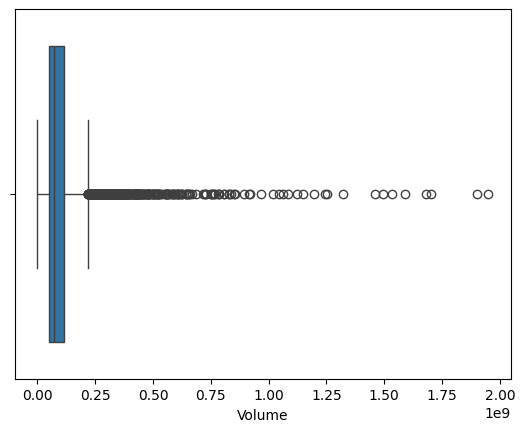

In [15]:
sb.boxplot(data=data_stock, x="Volume")

In [16]:
data_stock.duplicated().sum()

0

#DATA PROCESSING

##Encode Object Type

In [17]:
encoder = LabelEncoder()

data_obj = data_stock.select_dtypes(include=object)

for col in data_obj:
  data_stock[col] = encoder.fit_transform(data_stock[col])

##Delete Outliers

In [18]:
for col in data_stock.columns:
    Q1 = data_stock[col].quantile(0.25)
    Q3 = data_stock[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_stock = data_stock.loc[(data_stock[col] >= lower_bound) & (data_stock[col] <= upper_bound)]

##Final Data Check

<Axes: xlabel='Date'>

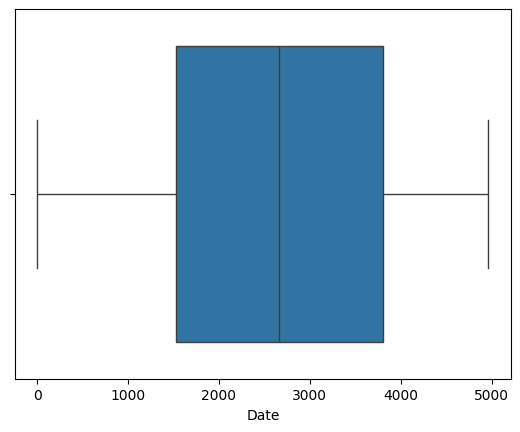

In [19]:
sb.boxplot(data=data_stock, x="Date")

<Axes: xlabel='Open'>

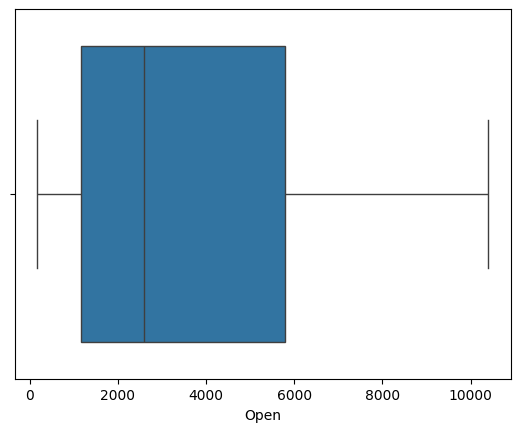

In [20]:
sb.boxplot(data=data_stock, x="Open")

<Axes: xlabel='High'>

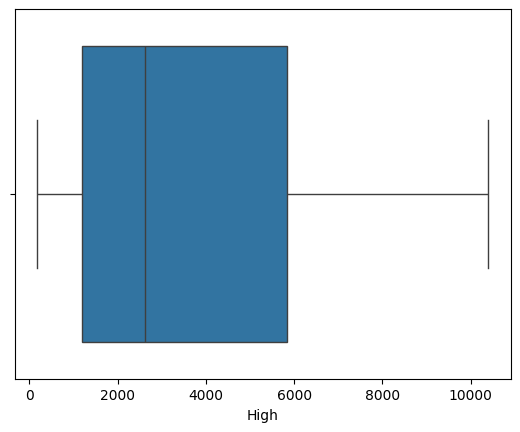

In [21]:
sb.boxplot(data=data_stock, x="High")

<Axes: xlabel='Low'>

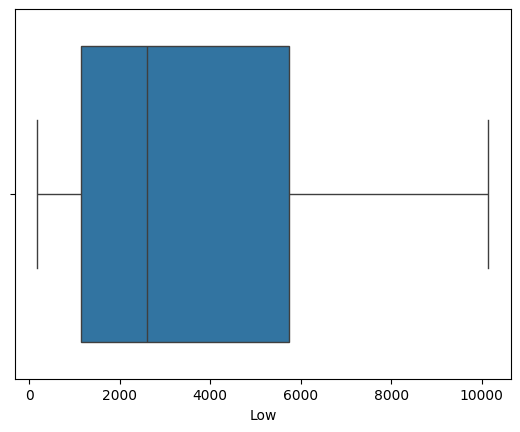

In [22]:
sb.boxplot(data=data_stock, x="Low")

<Axes: xlabel='Close'>

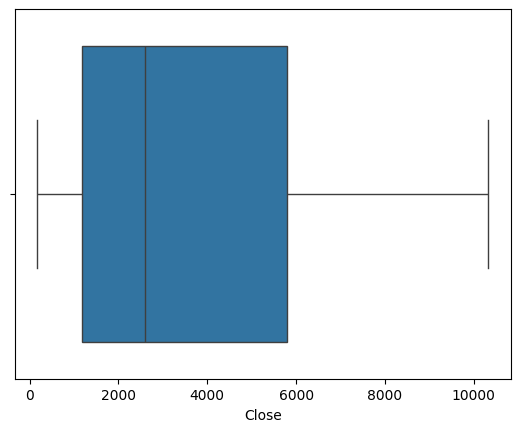

In [23]:
sb.boxplot(data=data_stock, x="Close")

<Axes: xlabel='Adj Close'>

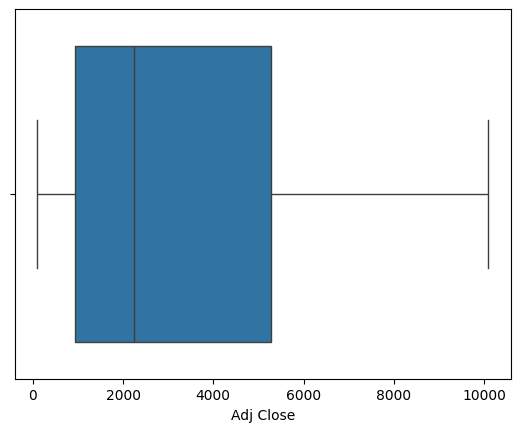

In [24]:
sb.boxplot(data=data_stock, x="Adj Close")

<Axes: xlabel='Volume'>

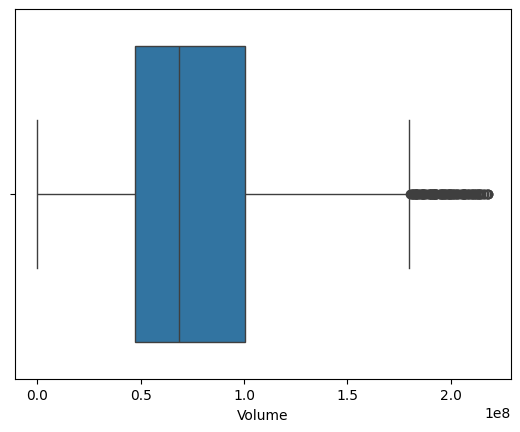

In [25]:
sb.boxplot(data=data_stock, x="Volume")

In [26]:
data_stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4525 entries, 2 to 4964
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4525 non-null   int64  
 1   Open       4525 non-null   float64
 2   High       4525 non-null   float64
 3   Low        4525 non-null   float64
 4   Close      4525 non-null   float64
 5   Adj Close  4525 non-null   float64
 6   Volume     4525 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 282.8 KB


In [27]:
data_stock.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,4525.000000,4525.000000,4525.000000,4525.000000,4525.000000,4525.000000,4.525000e+03
mean,2650.147845,3486.439227,3517.846961,3453.308287,3486.010497,3152.153812,7.768552e+07
std,1353.503325,2799.617362,2820.608979,2777.698520,2798.795637,2721.771461,4.433029e+07
min,2.000000,177.500000,180.000000,175.000000,177.500000,103.276207,0.000000e+00
25%,1527.000000,1170.000000,1190.000000,1150.000000,1170.000000,936.694946,4.712000e+07
50%,2665.000000,2605.000000,2625.000000,2590.000000,2605.000000,2235.821289,6.854430e+07
75%,3808.000000,5800.000000,5840.000000,5745.000000,5800.000000,5272.833008,1.004070e+08
max,4964.000000,10400.000000,10400.000000,10150.000000,10325.000000,10092.431641,2.182000e+08


In [28]:
data_stock.duplicated().sum()

0

#FEATURE SELECTION

##Find Correlation

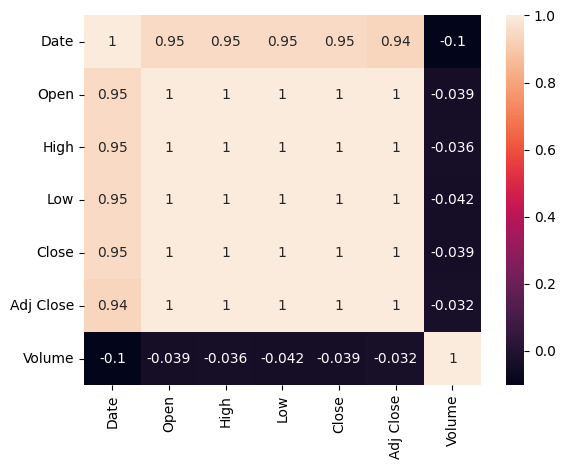

In [29]:
corr_matrix = data_stock.corr()
sb.heatmap(data = corr_matrix, annot = True)
plt.show()

In [30]:
abs_corr = abs(corr_matrix['Close'])
max_corr = abs_corr.loc[abs_corr != 1.0].max()

high_corr = abs_corr[abs_corr > (max_corr / 2)]
features = [col for col in data_stock.columns if col in high_corr]

#BUILD MODEL

In [31]:
X = data_stock[features].drop('Close', axis = 1)
Y = data_stock['Close']

In [32]:
print(X)

      Date     Open     High     Low     Adj Close
2        2    180.0    180.0   177.5    104.730766
3        3    177.5    180.0   177.5    104.730766
4        4    180.0    180.0   175.0    103.276207
6        6    182.5    182.5   177.5    104.730766
10      10    177.5    180.0   177.5    103.276207
...    ...      ...      ...     ...           ...
4960  4960  10000.0  10000.0  9850.0   9900.000000
4961  4961   9975.0  10000.0  9925.0  10000.000000
4962  4962   9975.0  10000.0  9825.0   9825.000000
4963  4963   9925.0   9975.0  9875.0   9950.000000
4964  4964  10000.0  10050.0  9950.0  10050.000000

[4525 rows x 5 columns]


In [33]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

##NORMALIZATION

In [34]:
from sklearn.preprocessing import MinMaxScaler

normal_scaler = MinMaxScaler(feature_range = (0,1))
normal_scaled_x = normal_scaler.fit_transform(data_stock)
data_stock = pd.DataFrame(normal_scaled_x, columns=data_stock.columns)

##LINEAR REGRESSION

In [35]:
LRM = LinearRegression().fit(X_Train, Y_Train)
LRMPredTrain = LRM.predict(X_Train)
LRMPredTest = LRM.predict(X_Test)

mse_lrm = mean_squared_error(Y_Test, LRMPredTest)
rmse_lrm = np.sqrt(mse_lrm)
mae_lrm = mean_absolute_error(Y_Test, LRMPredTest)
r2_lrm_test = r2_score(Y_Test, LRMPredTest)
r2_lrm_train = r2_score(Y_Train, LRMPredTrain)

###Output

In [36]:
print("Train Data Set")
print(f"R2 Score                  : {r2_lrm_train}")
print()

print("Test Data Set")
print(f"R2 Score                  : {r2_lrm_test}")
print(f"Mean Squared Error        : {mse_lrm}")
print(f"Root Mean Squared Error   : {rmse_lrm}")
print(f"Mean Absolute Error       : {mae_lrm}")

Train Data Set
R2 Score                  : 0.9998927607374066

Test Data Set
R2 Score                  : 0.9998977048745221
Mean Squared Error        : 817.8246270420091
Root Mean Squared Error   : 28.59763324196618
Mean Absolute Error       : 18.48542877651409


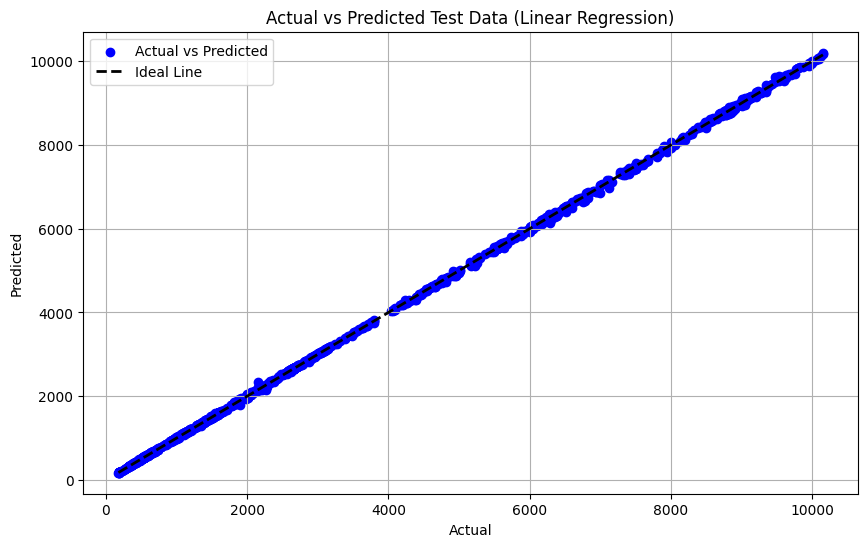

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_Test, LRMPredTest, color='blue', label='Actual vs Predicted')
plt.plot([Y_Test.min(), Y_Test.max()], [Y_Test.min(), Y_Test.max()], 'k--', lw=2, label='Ideal Line')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Test Data (Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()

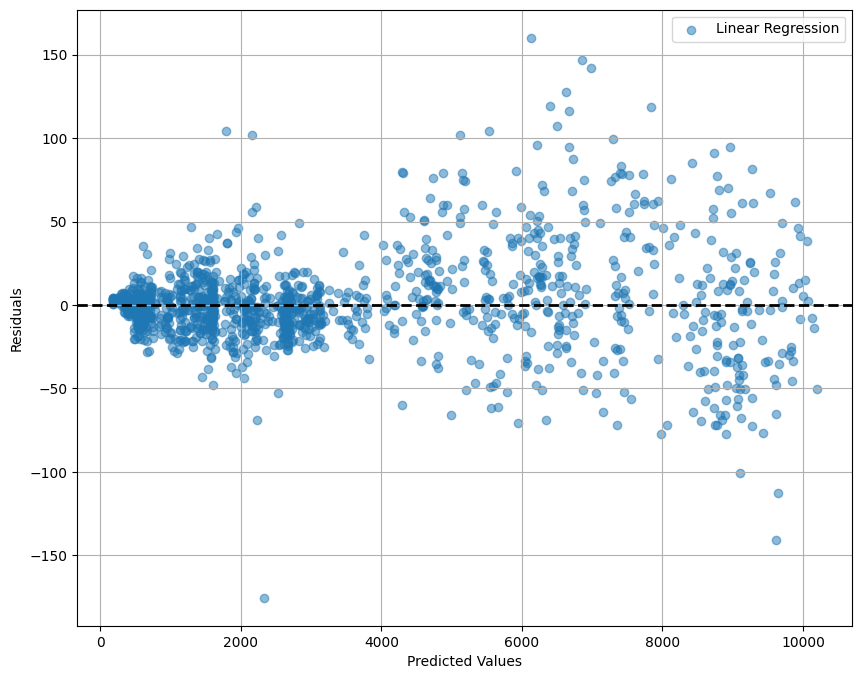

In [63]:
plt.figure(figsize=(10, 8))

plt.scatter(LRMPredTest, Y_Test - LRMPredTest, alpha=0.5, label='Linear Regression')

plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

##RANDOM FOREST REGRESSOR

In [39]:
RFR = RandomForestRegressor().fit(X_Train, Y_Train)
RFRPredTrain = RFR.predict(X_Train)
RFRPredTest = RFR.predict(X_Test)

mse_rfr = mean_squared_error(Y_Test, RFRPredTest)
rmse_rfr = np.sqrt(mse_rfr)
mae_rfr = mean_absolute_error(Y_Test, RFRPredTest)
r2_rfr_test = r2_score(Y_Test, RFRPredTest)
r2_rfr_train = r2_score(Y_Train, RFRPredTrain)

###Output

In [40]:
print("Train Data Set")
print(f"R2 Score                  : {r2_rfr_train}")
print()

print("Test Data Set")
print(f"R2 Score                  : {r2_rfr_test}")
print(f"Mean Squared Error        : {mse_rfr}")
print(f"Root Mean Squared Error   : {rmse_rfr}")
print(f"Mean Absolute Error       : {mae_rfr}")

Train Data Set
R2 Score                  : 0.9999898507262316

Test Data Set
R2 Score                  : 0.9999320156038687
Mean Squared Error        : 543.5186979933723
Root Mean Squared Error   : 23.313487469560883
Mean Absolute Error       : 10.847330633284233


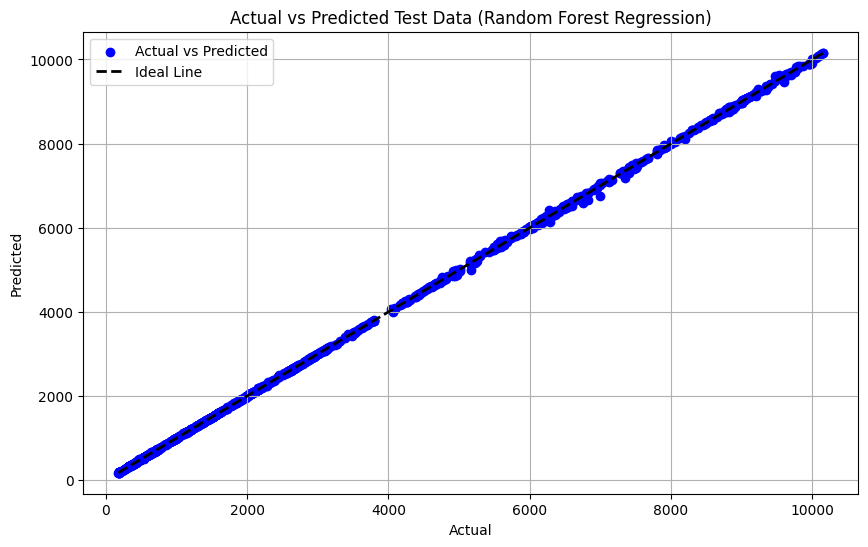

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_Test, RFRPredTest, color='blue', label='Actual vs Predicted')
plt.plot([Y_Test.min(), Y_Test.max()], [Y_Test.min(), Y_Test.max()], 'k--', lw=2, label='Ideal Line')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Test Data (Random Forest Regression)')
plt.legend()
plt.grid(True)
plt.show()

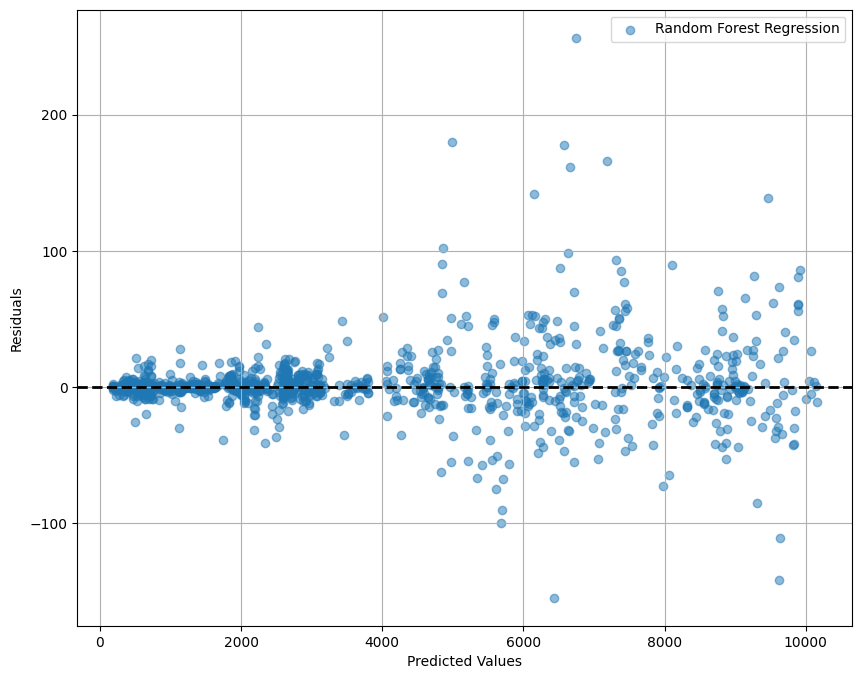

In [42]:
plt.figure(figsize=(10, 8))

plt.scatter(RFRPredTest, Y_Test - RFRPredTest, alpha=0.5, label='Random Forest Regression')

plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

##Gradient Boosting

In [43]:
GBR = GradientBoostingRegressor()
GBR.fit(X_Train, Y_Train)
GBRPredTrain = GBR.predict(X_Train)
GBRPredTest = GBR.predict(X_Test)

mse_gbr = mean_squared_error(Y_Test, GBRPredTest)
rmse_gbr = np.sqrt(mse_gbr)
mae_gbr = mean_absolute_error(Y_Test, GBRPredTest)
r2_gbr_train = r2_score(Y_Train, GBRPredTrain)
r2_gbr_test = r2_score(Y_Test, GBRPredTest)

## Output

In [44]:
print("Train Data Set")
print(f"R2 Score                  : {r2_gbr_train}")
print()

print("Test Data Set")
print(f"R2 Score                  : {r2_gbr_test}")
print(f"Mean Squared Error        : {mse_gbr}")
print(f"Root Mean Squared Error   : {rmse_gbr}")
print(f"Mean Absolute Error       : {mae_gbr}")

Train Data Set
R2 Score                  : 0.9999364485157252

Test Data Set
R2 Score                  : 0.9998531398693562
Mean Squared Error        : 1174.1109951234644
Root Mean Squared Error   : 34.265303079404745
Mean Absolute Error       : 20.948472604536324


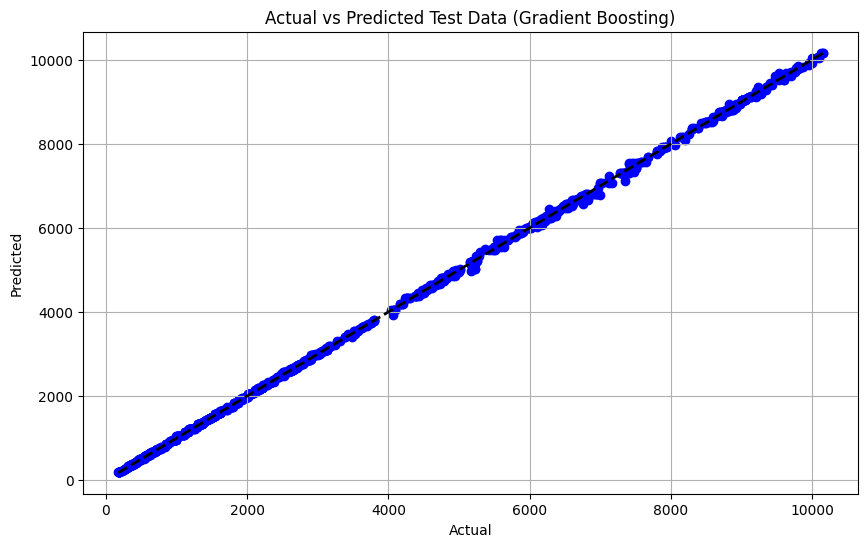

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_Test, GBRPredTest, color='blue', label='Actual vs Predicted')
plt.plot([Y_Test.min(), Y_Test.max()], [Y_Test.min(), Y_Test.max()], 'k--', lw=2, label='Ideal Line')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Test Data (Gradient Boosting)')
plt.grid(True)
plt.show()

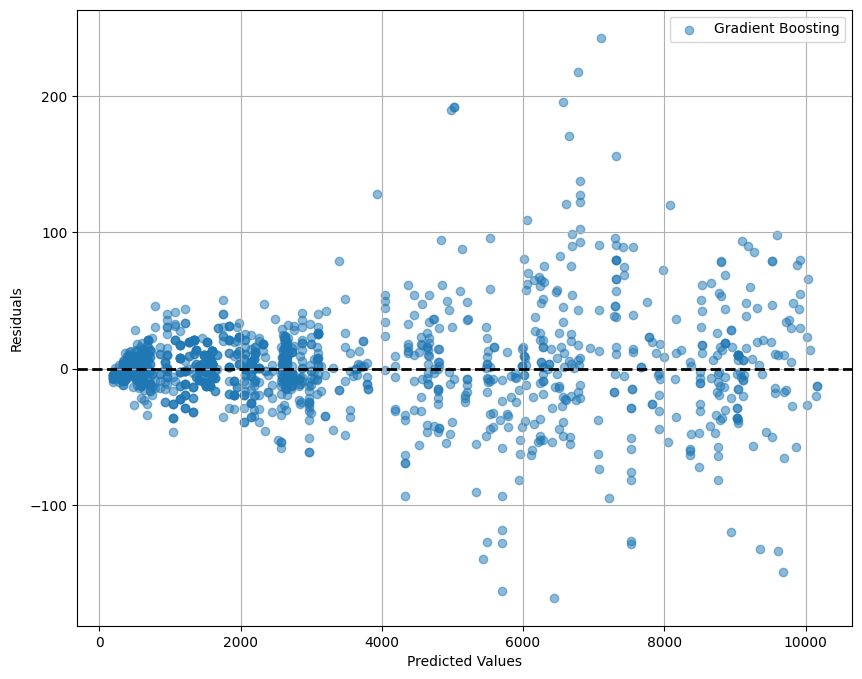

In [46]:
plt.figure(figsize=(10, 8))

plt.scatter(GBRPredTest, Y_Test - GBRPredTest, alpha=0.5, label='Gradient Boosting')

plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

##XGBoost

In [47]:
XGB = XGBRegressor().fit(X_Train, Y_Train)
XGBPredTrain = XGB.predict(X_Train)
XGBPredTest = XGB.predict(X_Test)

mse_xgb = mean_squared_error(Y_Test, XGBPredTest)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(Y_Test, XGBPredTest)
r2_xgb_test = r2_score(Y_Test, XGBPredTest)
r2_xgb_train = r2_score(Y_Train, XGBPredTrain)

In [48]:
print("Train Data Set")
print(f"R2 Score                  : {r2_xgb_train}")
print()

print("Test Data Set")
print(f"R2 Score                  : {r2_xgb_test}")
print(f"Mean Squared Error        : {mse_xgb}")
print(f"Root Mean Squared Error   : {rmse_xgb}")
print(f"Mean Absolute Error       : {mae_xgb}")

Train Data Set
R2 Score                  : 0.9999815340898734

Test Data Set
R2 Score                  : 0.9999168529538642
Mean Squared Error        : 664.7403938164107
Root Mean Squared Error   : 25.78255987710318
Mean Absolute Error       : 14.683839137845608


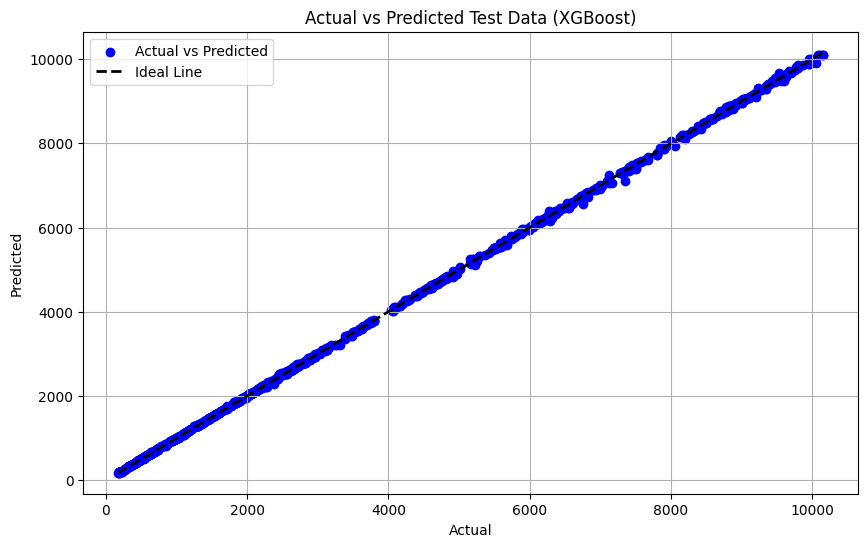

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_Test, XGBPredTest, color='blue', label='Actual vs Predicted')
plt.plot([Y_Test.min(), Y_Test.max()], [Y_Test.min(), Y_Test.max()], 'k--', lw=2, label='Ideal Line')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Test Data (XGBoost)')
plt.legend()
plt.grid(True)
plt.show()

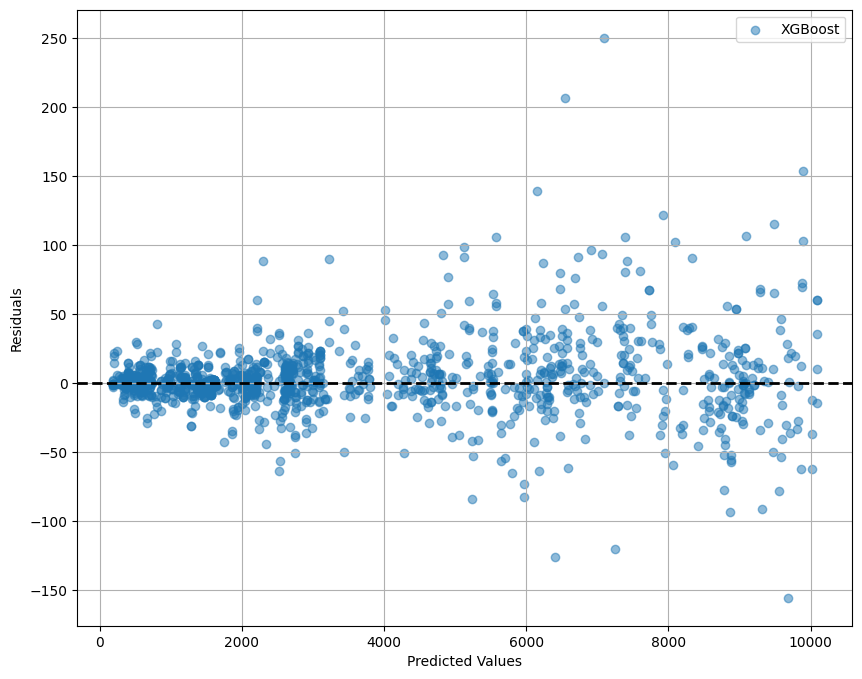

In [50]:
plt.figure(figsize=(10, 8))

plt.scatter(XGBPredTest, Y_Test - XGBPredTest, alpha=0.5, label='XGBoost')

plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

##Neural Network Regressor

In [51]:
num_features = X.shape[1]
print(num_features)

5


In [52]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(num_features,)),  # Adjust input_shape accordingly
    Dense(32, activation='relu'),
    Dense(1)  # Output layer with 1 neuron for regression
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
history = model.fit(X_Train, Y_Train, epochs=50, batch_size=32, validation_data=(X_Test, Y_Test))
NNPredTrain = model.predict(X_Train)
NNPredTest = model.predict(X_Test)

mse_nn = mean_squared_error(Y_Test, NNPredTest)
rmse_nn = np.sqrt(mse_nn)
mae_nn = mean_absolute_error(Y_Test, NNPredTest)
r2_nn_train = r2_score(Y_Train, NNPredTrain)
r2_nn_test = r2_score(Y_Test, NNPredTest)

Epoch 1/50
99/99 [==============================] - 1s 5ms/step - loss: 76455.2188 - mae: 153.9647 - mse: 76455.2188 - val_loss: 1173.2693 - val_mae: 23.3875 - val_mse: 1173.2693
Epoch 2/50
99/99 [==============================] - 0s 2ms/step - loss: 1424.2349 - mae: 25.1455 - mse: 1424.2349 - val_loss: 1441.2155 - val_mae: 25.9350 - val_mse: 1441.2155
Epoch 3/50
99/99 [==============================] - 0s 2ms/step - loss: 1296.5985 - mae: 23.4821 - mse: 1296.5985 - val_loss: 1133.9293 - val_mae: 21.6452 - val_mse: 1133.9293
Epoch 4/50
99/99 [==============================] - 0s 2ms/step - loss: 1270.2052 - mae: 23.0119 - mse: 1270.2052 - val_loss: 1414.2374 - val_mae: 24.3279 - val_mse: 1414.2374
Epoch 5/50
99/99 [==============================] - 0s 3ms/step - loss: 1416.2692 - mae: 23.7238 - mse: 1416.2692 - val_loss: 1026.5686 - val_mae: 20.1120 - val_mse: 1026.5686
Epoch 6/50
99/99 [==============================] - 0s 3ms/step - loss: 1466.5848 - mae: 24.0036 - mse: 1466.5848 - v

In [53]:
print("Train Data Set")
print(f"R2 Score                  : {r2_nn_train}")
print()

print("Test Data Set")
print(f"R2 Score                  : {r2_nn_test}")
print(f"Mean Squared Error        : {mse_nn}")
print(f"Root Mean Squared Error   : {rmse_nn}")
print(f"Mean Absolute Error       : {mae_nn}")

Train Data Set
R2 Score                  : 0.9998533723769083

Test Data Set
R2 Score                  : 0.9998521380175357
Mean Squared Error        : 1182.1205565534997
Root Mean Squared Error   : 34.38198011391287
Mean Absolute Error       : 22.144219534737722


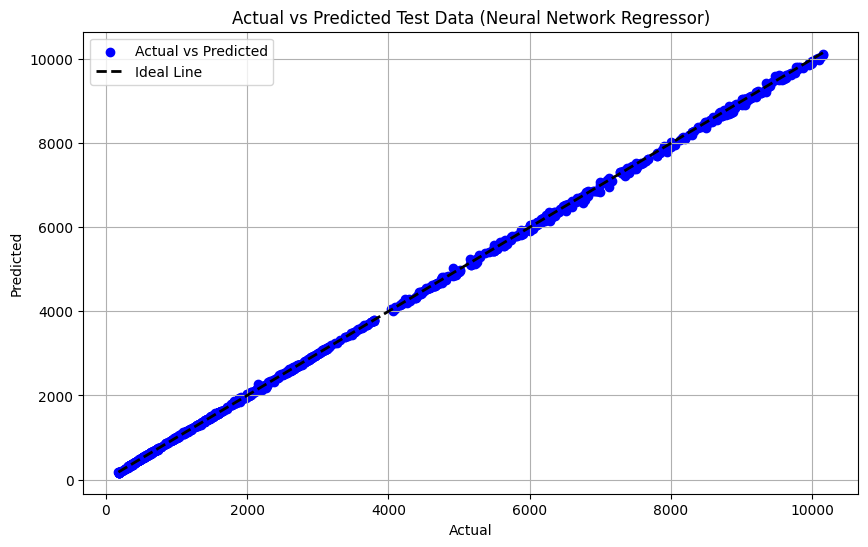

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_Test, NNPredTest, color='blue', label='Actual vs Predicted')
plt.plot([Y_Test.min(), Y_Test.max()], [Y_Test.min(), Y_Test.max()], 'k--', lw=2, label='Ideal Line')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Test Data (Neural Network Regressor)')
plt.legend()
plt.grid(True)
plt.show()

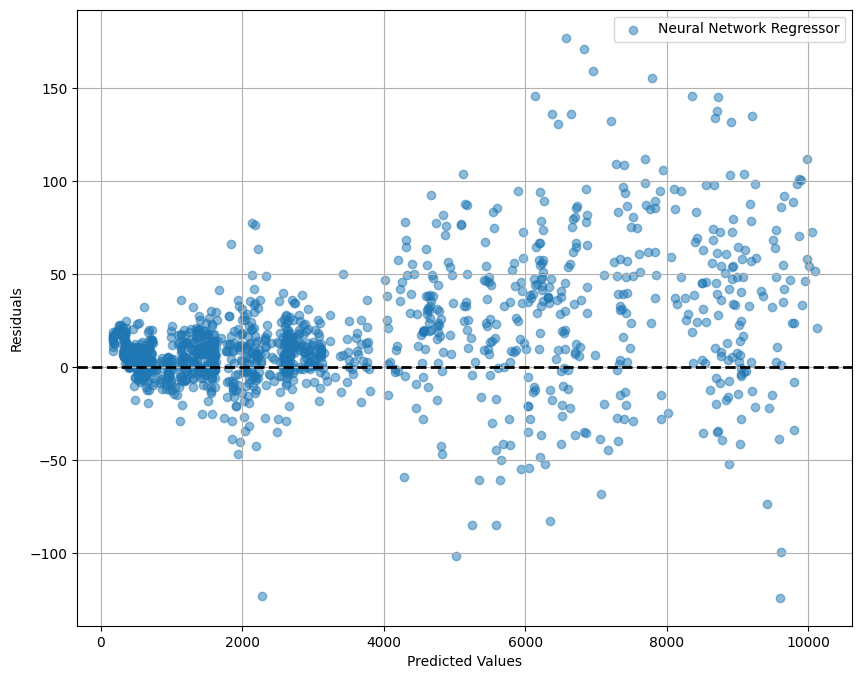

In [55]:
plt.figure(figsize=(10, 8))

NNPredTest = NNPredTest.ravel()
Y_Test = Y_Test.ravel()

residuals_nn = Y_Test - NNPredTest
plt.scatter(NNPredTest, residuals_nn, alpha=0.5, label='Neural Network Regressor')

plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

#Comparisons

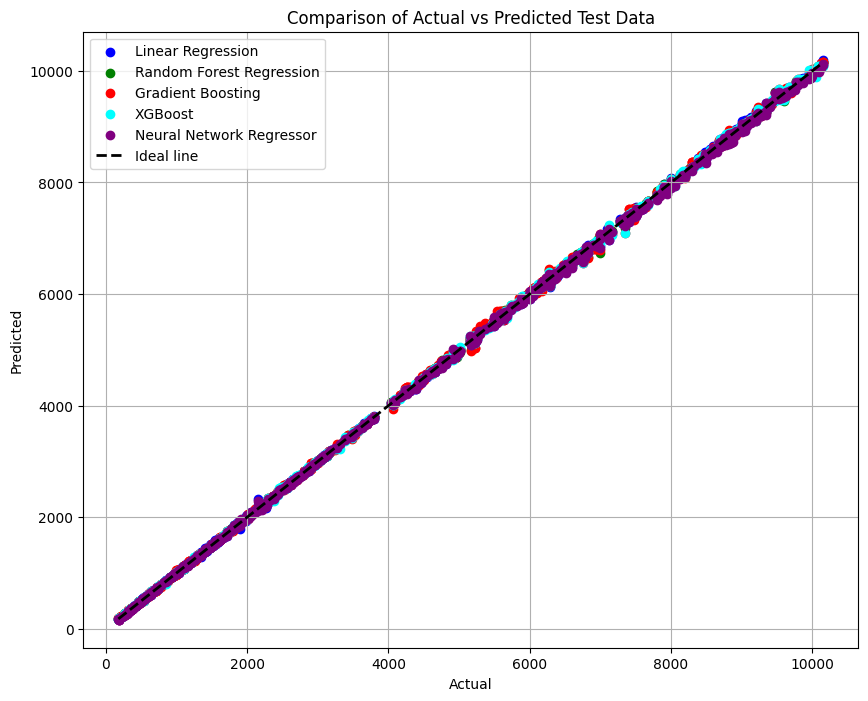

In [56]:
plt.figure(figsize=(10, 8))

plt.scatter(Y_Test, LRMPredTest, color='blue', label='Linear Regression')
plt.scatter(Y_Test, RFRPredTest, color='green', label='Random Forest Regression')
plt.scatter(Y_Test, GBRPredTest, color='red', label='Gradient Boosting')
plt.scatter(Y_Test, XGBPredTest, color='cyan', label='XGBoost')
plt.scatter(Y_Test, NNPredTest, color='purple', label='Neural Network Regressor')

plt.plot([Y_Test.min(), Y_Test.max()], [Y_Test.min(), Y_Test.max()], 'k--', lw=2, label='Ideal line')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Comparison of Actual vs Predicted Test Data')
plt.legend()
plt.grid(True)
plt.show()

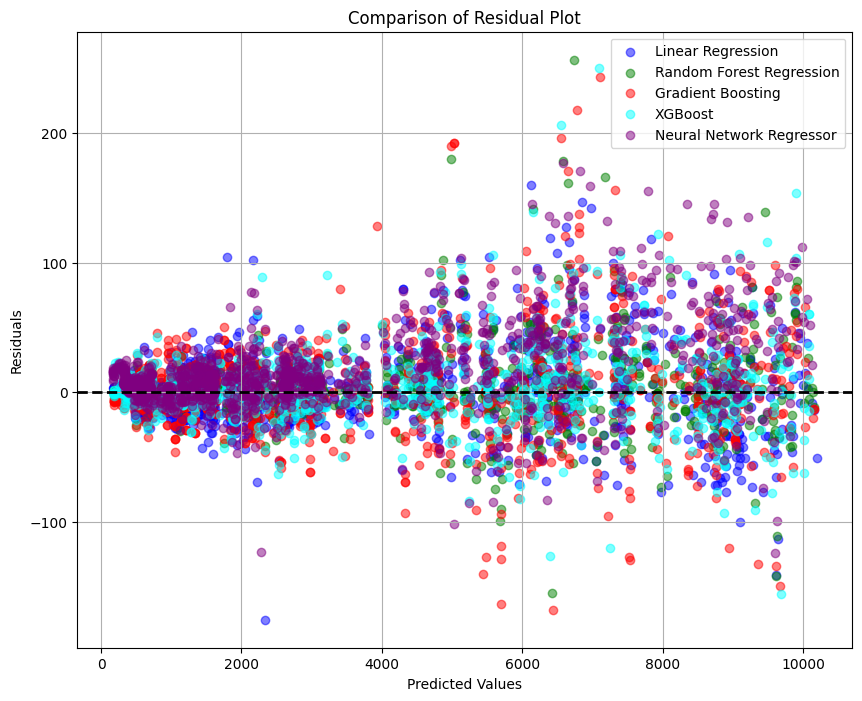

In [57]:
plt.figure(figsize=(10, 8))

plt.scatter(LRMPredTest, Y_Test - LRMPredTest, color='blue', alpha=0.5, label='Linear Regression')
plt.scatter(RFRPredTest, Y_Test - RFRPredTest, color='green', alpha=0.5, label='Random Forest Regression')
plt.scatter(GBRPredTest, Y_Test - GBRPredTest, color='red', alpha=0.5, label='Gradient Boosting')
plt.scatter(XGBPredTest, Y_Test - XGBPredTest, color='cyan', alpha=0.5, label='XGBoost')
plt.scatter(NNPredTest, residuals_nn, color='purple', alpha=0.5, label='Neural Network Regressor')

plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Comparison of Residual Plot')
plt.legend()
plt.grid(True)
plt.show()

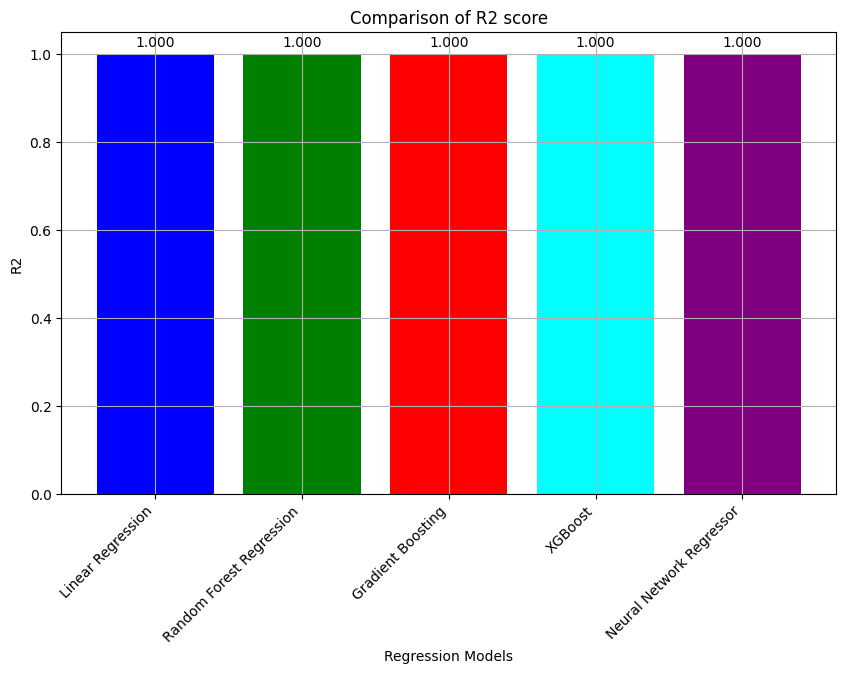

In [58]:
models = ['Linear Regression', 'Random Forest Regression', 'Gradient Boosting', 'XGBoost', 'Neural Network Regressor']
r2_values = [r2_lrm_test, r2_rfr_test, r2_gbr_test, r2_xgb_test, r2_nn_test]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, r2_values, color=['blue', 'green', 'red', 'cyan', 'purple'])

for bar, r2_value in zip(bars, r2_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{r2_value:.3f}', ha='center', va='bottom')

plt.xlabel('Regression Models')
plt.ylabel('R2')
plt.title('Comparison of R2 score')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

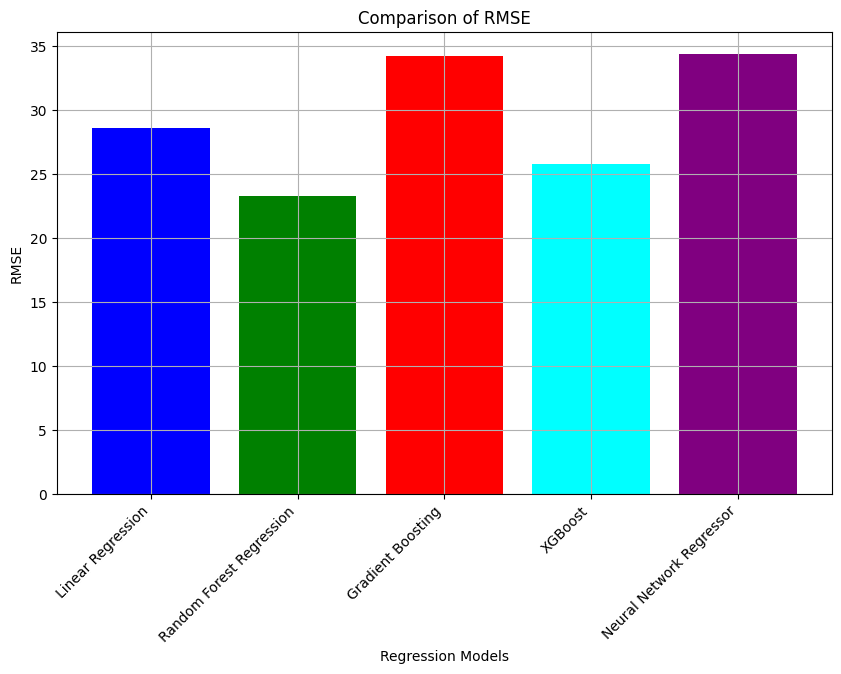

In [59]:
models = ['Linear Regression', 'Random Forest Regression', 'Gradient Boosting', 'XGBoost', 'Neural Network Regressor']
rmse_values = [rmse_lrm, rmse_rfr, rmse_gbr, rmse_xgb, rmse_nn]

plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color=['blue', 'green', 'red', 'cyan', 'purple'])
plt.xlabel('Regression Models')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

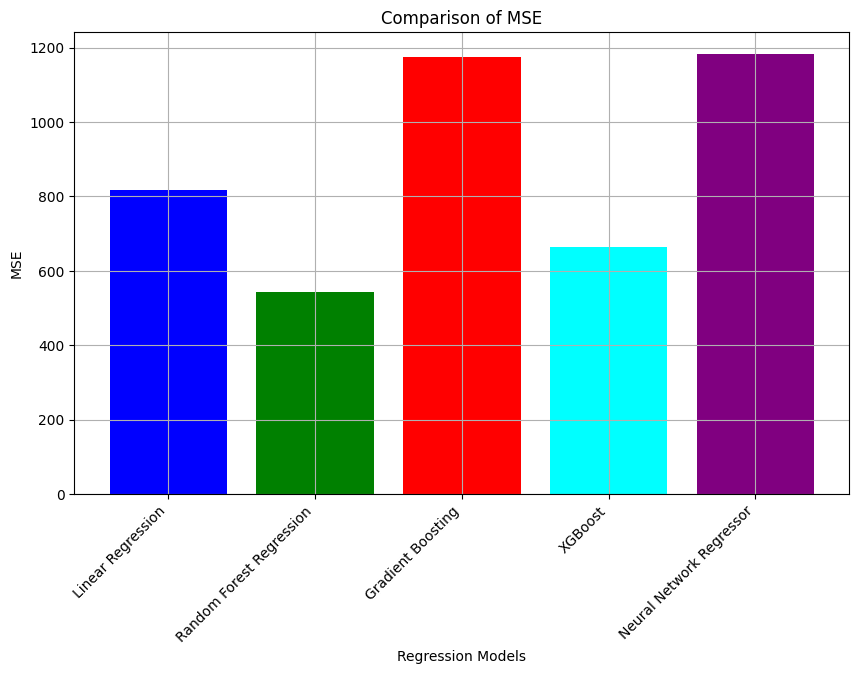

In [60]:
models = ['Linear Regression', 'Random Forest Regression', 'Gradient Boosting', 'XGBoost', 'Neural Network Regressor']
mse_values = [mse_lrm, mse_rfr, mse_gbr, mse_xgb, mse_nn]

plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['blue', 'green', 'red', 'cyan', 'purple'])
plt.xlabel('Regression Models')
plt.ylabel('MSE')
plt.title('Comparison of MSE')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

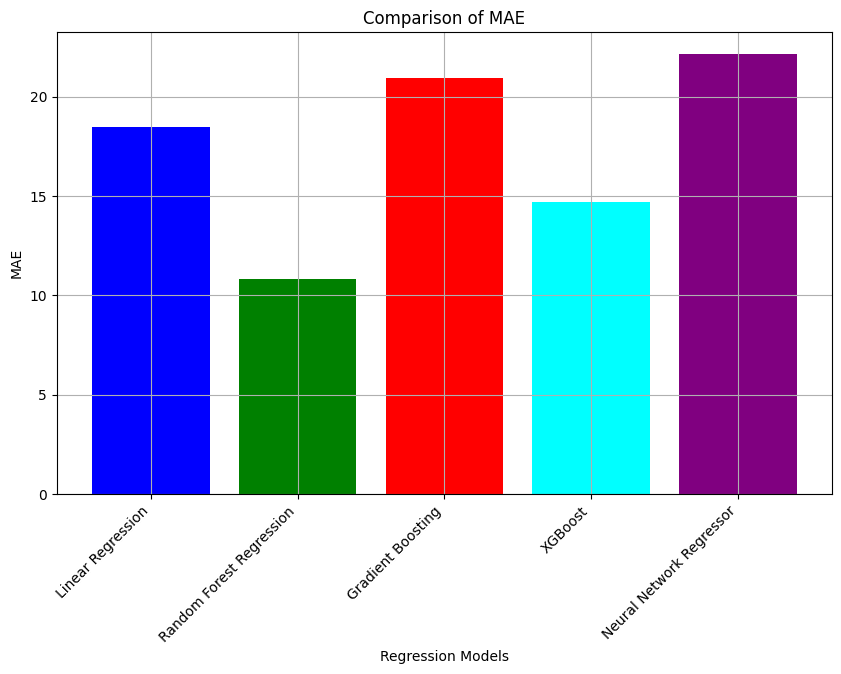

In [61]:
models = ['Linear Regression', 'Random Forest Regression', 'Gradient Boosting', 'XGBoost', 'Neural Network Regressor']
mae_values = [mae_lrm, mae_rfr, mae_gbr, mae_xgb, mae_nn]

plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, color=['blue', 'green', 'red', 'cyan', 'purple'])
plt.xlabel('Regression Models')
plt.ylabel('MAE')
plt.title('Comparison of MAE')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()